# Redes neuronales artificiales - Perceptrón

El objetivo de la AI es el desarrollo de paradigmas o algoritmos que requieren máquinas para desempeñar tareas cognituvas, en las cuales actualmente los humanos son mejores. Una sistema de AI debe ser capaz de hacer tres cosas: 1) almacenar conocimiento, 2) aplicar el conocimiento almacenado para respover problemas, 3) adquirir nuevo conocimiento a través de la experiencia. Un sistema de AI tiene tres componentes principales: representación, razonamiento y aprendizaje. Las redes neuronales cumplen con los tres principios pero trabajan con paralelismo, no en forma serial como suelen trabajar los algoritmos de AI.

## Implementación

La libraría que se utilizará para el desarrollo de los códigos se llama NeuroLab http://pythonhosted.org/neurolab/. Para la instalación se debe ejecutar el comando en el promp de Anaconda.

$ pip install neurolab

ó

$ pip3 install neurolab

## Construcción de un clasificador basado en un perceptron

Un Perceptron es el componente básico de una ANN. Es un modelo de una ANN de una sola capa que toma las entradas, realiza cálculos sobre ellas y luego produce una salida. Utiliza una función lineal simple para tomar la decisión. Digamos que estamos tratando con un punto de datos de entrada  N−dimensional. Un Perceptron calcula la suma ponderada de esos  NN números y luego agrega una constante para producir la salida. La constante se llama sesgo (bias) de la neurona. Es notable observar que estos perceptrones simples se utilizan para diseñar redes neuronales profundas muy complejas. Veamos cómo construir un clasificador basado en Perceptron usando NeuroLab.

In [2]:
#importamos las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

In [5]:
#cargamos los datos del archivo. Consisten en dos características y una etiqueta separados por espacio
datos = np.loadtxt('data_perceptron.txt')

#los separamos en datos y etiquetas
X = datos[:,:2]
etiquetas = datos[:,2]
print(etiquetas)
#reordenamos las etiquetas para que queden en formato columna
y = np.vstack(etiquetas)
print(y.shape)

[0. 0. 0. 1. 1.]
(5L, 1L)


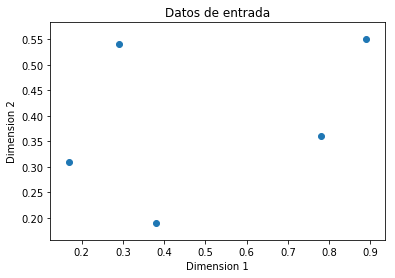

In [4]:
#graficamos los datos de entrada
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Datos de entrada')
plt.show()
#definimos los valores máximos y mínimos que puede tomar cada dimensión
dim1_min, dim1_max, dim2_min, dim2_max = 0,1,0,1
#Dado que los datos están seprados en dos clases, solo necesitamos un bit
#para representar la salida. Por tanto la capa de salida solo tendrá una neurona

#Número de neuronas en la capa de salida
num_output = y.shape[1]

#tenemos un conjunto de datos de dos dimensiones, definimos un perceptron
# con dos neuronas a la entrada y le asignamos una a cada dimensión
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1,dim2], num_output)


In [5]:
#entrenamos el perceptron con el conjunto de entrenamiento 
# lr es la tasa de aprendizaje, e indica que tan rápico o que tan lento se actualizan los pasos
#epochs indica el número de pasadas por todo el conjunto de entrenamiento
progreso_error = perceptron.train(X, y, epochs=100, show=20, lr=0.03)
perceptron.layers[0].np['w'] #con esta instrucción conocemos los pesos para la capa de entrada

The goal of learning is reached


array([[ 0.0408,  0.0231]])

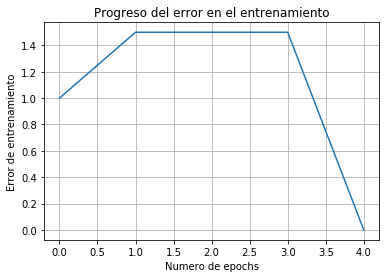

In [6]:
#graficamos el progreso de entrenamiento usando la métrica del error
plt.figure() 
plt.plot(progreso_error) 
plt.xlabel('Numero de epochs') 
plt.ylabel('Error de entrenamiento') 
plt.title('Progreso del error en el entrenamiento') 
plt.grid()
plt.show()

In [7]:
#vamos a validar con el mismo conjunto de entrenamiento. Recuerda que la validación se hace normalmente con el conjunto de test
y_pred = perceptron.sim(X)
print('El acierto de clasificación es: ', (y==y_pred).sum()/len(y)*100, '%')

El acierto de clasificación es:  100.0 %


In [8]:
#si queremos modificar los pesos de las entradas, podemos utilizar la siguiente instrucción:
perceptron.layers[0].np['w'] = [[0.8,1]] #para x1 el peso será 0.8, para x2 el peso será 1
y_pred = perceptron.sim(X) #con esto validamos nuevamente la red pero con los pesos que nosotros fijamos
print('El acierto de clasificación es: ', (y==y_pred).sum()/len(y)*100, '%')

El acierto de clasificación es:  40.0 %


** Actividad 1**

Determina los pesos de las dos entradas para un perceptrón que realice la operación AND y otro que realice la operación OR. Valida el resultado con el conjunto de datos de entrada. Luego entrena el perceptrón para que el mismo encuentre los pesos. Valida nuevamente los datos. ¿Qué puedes concluir?

[ 0.  0.  0.  1.]
[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]]
[[ 0.]
 [ 0.]
 [ 0.]
 [ 1.]]


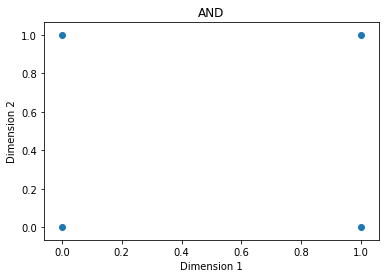

The goal of learning is reached


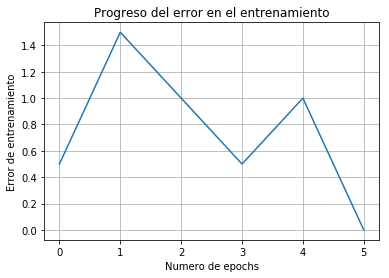

El acierto de clasificación es:  75.0 %


In [9]:
#cargamos los datos del archivo. Consisten en dos características y una etiqueta separados por espacio
datos = np.loadtxt('AND.txt')

#los separamos en datos y etiquetas
X, etiquetas = datos[:,:-1], datos[:,-1]
print(etiquetas)
#reordenamos las etiquetas para que queden en formato columna
y = np.vstack(etiquetas)
print(X)
print(y)

#graficamos los datos de entrada
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('AND')
plt.show()
#definimos los valores máximos y mínimos que puede tomar cada dimensión
dim1_min, dim1_max, dim2_min, dim2_max = 0,1,0,1

#Dado que los datos están seprados en dos clases, solo necesitamos un bit
#para representar la salida. Por tanto la capa de salida solo tendrá una neurona

#Número de neuronas en la capa de salida
num_output = y.shape[1]
#tenemos un conjunto de datos de dos dimensiones, definimos un perceptron
# con dos neuronas a la entrada y le asignamos una a cada dimensión
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1,dim2], num_output)
#entrenamos el perceptron con el conjunto de entrenamiento 
# lr es la tasa de aprendizaje, e indica que tan rápico o que tan lento se actualizan los pasos
#epochs indica el número de pasadas por todo el conjunto de entrenamiento
progreso_error = perceptron.train(X, y, epochs=100, show=20, lr=0.03)
# perceptron.layers[0].np['w'] #con esta instrucción conocemos los pesos para la capa de entrada

perceptron.layers[0].np['w'] = [[1.7,-1.3]] #Le asignamos los pesos que nosotros queramos o hallamos previamente

#graficamos el progreso de entrenamiento usando la métrica del error
plt.figure() 
plt.plot(progreso_error) 
plt.xlabel('Numero de epochs') 
plt.ylabel('Error de entrenamiento') 
plt.title('Progreso del error en el entrenamiento') 
plt.grid()
plt.show()

#vamos a validar con el mismo conjunto de entrenamiento. Recuerda que la validación se hace normalmente con el conjunto de test
y_pred = perceptron.sim(X)
print('El acierto de clasificación es: ', (y==y_pred).sum()/len(y)*100, '%')

[ 0.  1.  1.  1.]
[[ 0.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  1.]]
[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]]


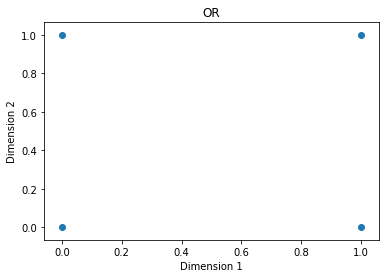

The goal of learning is reached


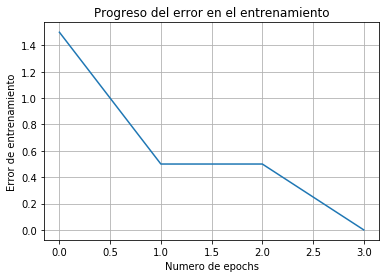

El acierto de clasificación es:  100.0 %


In [10]:
#cargamos los datos del archivo. Consisten en dos características y una etiqueta separados por espacio
datos = np.loadtxt('OR.txt')

#los separamos en datos y etiquetas
X, etiquetas = datos[:,:-1], datos[:,-1]
print(etiquetas)
#reordenamos las etiquetas para que queden en formato columna
y = np.vstack(etiquetas)
print(X)
print(y)

#graficamos los datos de entrada
plt.figure()
plt.scatter(X[:,0],X[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('OR')
plt.show()
#definimos los valores máximos y mínimos que puede tomar cada dimensión
dim1_min, dim1_max, dim2_min, dim2_max = 0,1,0,1

#Dado que los datos están seprados en dos clases, solo necesitamos un bit
#para representar la salida. Por tanto la capa de salida solo tendrá una neurona

#Número de neuronas en la capa de salida
num_output = y.shape[1]
#tenemos un conjunto de datos de dos dimensiones, definimos un perceptron
# con dos neuronas a la entrada y le asignamos una a cada dimensión
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1,dim2], num_output)
#entrenamos el perceptron con el conjunto de entrenamiento 
# lr es la tasa de aprendizaje, e indica que tan rápico o que tan lento se actualizan los pasos
#epochs indica el número de pasadas por todo el conjunto de entrenamiento
progreso_error = perceptron.train(X, y, epochs=100, show=20, lr=0.03)
perceptron.layers[0].np['w'] #con esta instrucción conocemos los pesos para la capa de entrada

# perceptron.layers[0].np['w'] = [[1.7,-1.3]] #Le asignamos los pesos que nosotros queramos o hallamos previamente

#graficamos el progreso de entrenamiento usando la métrica del error
plt.figure() 
plt.plot(progreso_error) 
plt.xlabel('Numero de epochs') 
plt.ylabel('Error de entrenamiento') 
plt.title('Progreso del error en el entrenamiento') 
plt.grid()
plt.show()

#vamos a validar con el mismo conjunto de entrenamiento. Recuerda que la validación se hace normalmente con el conjunto de test
y_pred = perceptron.sim(X)
print('El acierto de clasificación es: ', (y==y_pred).sum()/len(y)*100, '%')

** Actividad 2**

Se debe entrenar y validar un perceptrón para la base de datos $\verb|datos_perceptron_2.txt|$. El problema es que esa base de datos tiene como etiquetas 0,1,2, por lo tanto vas a necesitar 2 neuronas en la capa de salida. Para hacer esta actividad ten en cuenta los siguientes requerimientos:

1. Dividir la base de datos en entrenamiento y validación.
2. Preprocesar los datos.
3. Convertir las etiquetas en binario (00, 10, 01)
4. Definir un perceptron con dos nodos de entrada y una capa de salida con dos neuronas
5. Las dimensiones mínimos y máximas de la entrada las debes encontrar (no son necesariamente 0 y 1 como en el ejemplo).
6. Entrenar la perceptrón.
7. Determinar los pesos que el algoritmo encontró.
8. Validar el perceptrón con los datos de test.
9. Encontrar el acierto de clasificación comparando y_test y y_pred

In [11]:
#Punto 1
#cargamos los datos del archivo. Consisten en dos características y una etiqueta separados por espacio
datos = np.loadtxt('datos_perceptron_2.txt',delimiter =',')

#los separamos en datos y etiquetas
X, etiquetas = datos[:,:-1], datos[:,-1]
# print(etiquetas)
#reordenamos las etiquetas para que queden en formato columna
y = np.vstack(etiquetas)
print(X)
# print(y)

[[ 5.88  6.2 ]
 [ 5.7   3.59]
 [ 3.42  4.47]
 ..., 
 [ 6.11  4.65]
 [ 7.57  3.97]
 [ 3.89  4.13]]


In [12]:
#Definiciones
from sklearn.model_selection import train_test_split
import math
def remocion_train_test(X_train,X_test): #Método para preprocesar X_train y X_test con remoción de la media
    media_train = X_train.mean(axis = 0) # calculamos la media del conjunto de entrenamiento
    desviacion_train = X_train.std(axis = 0) # calculamos la desviacion estándar del conjunto de entrenamiento
    
    X_train_rem = (X_train - media_train)/desviacion_train # preprocesamos la matriz de entrenamiento
    X_test_rem = (X_test - media_train)/desviacion_train # preprocesamos la matriz de validacion o test
    
    return X_train_rem, X_test_rem

In [13]:
#Punto 2
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=5)
X_train_remocion, X_test_remocion = remocion_train_test(X_train, X_test)
# print(y_test)

In [14]:
#Punto 3
def convertir_a_binario(numero, longitud): #Método para convertir una un número en un vector con su valor binario
    vector_binario = np.zeros([longitud]) #Vector de las posiciones deseadas que guardará el valor en binario
    binario = bin(numero)[2:] #Método para obtener el valor binario de un número
    for i in range(longitud-len(binario)): #En caso que el valor en binario tenga longitud menor a  la deseada
        binario = '0' + binario   #Se le agregan ceros a la izquierda
#     print (etiqueta ," en binario es ", binario)
    for i in range(longitud):
        vector_binario[i] = binario[i] #Guardar el valor en binario en la posición correspondiente, cada posición del vector es un caracter del numero en binario
    return vector_binario.astype(int) #Devuelvo el vector como entero

# temp = convertir_a_binario(0,1)
# print(temp)

def etiquetas_a_binario(vector): #Método para convertir un vector de números a un vector de vectores con su valor binario
    filas = len(vector) #Numero de filas en el vector
    maximo = vector.max().astype(int) #Numero máximo del vector
    maximo_binario = bin(maximo)[2:] #Su equivalente en binario
    longitud = len(maximo_binario) #Su longitud, determina la longitud de cada posición del vector final
#     longitud = len(bin((vector.max()).astype(int))[2:]) #La longitud del valor en binario basado en el número mayor del vector, determina la longitud del vector final
    etiquetas_binarias = np.zeros((filas,longitud)) #Matriz que se llenará con las etiquetas convertidas a binario
    for i in range(filas): #Para cada fila en el vector
        etiqueta = vector[i] #Obtengo la etiqueta que quiero convertir a binario
        etiquetas_binarias[i] = convertir_a_binario(int(etiqueta),longitud) #La convierto en binario
    return etiquetas_binarias 

y_train_binario = etiquetas_a_binario(y_train)
y_test_binario = etiquetas_a_binario(y_test)
print(y_train[:8], y_train_binario[:8])
print(y_train.shape, y_train_binario.shape)

[[ 0.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 2.]] [[ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 1.  0.]]
(630, 1) (630, 2)


In [15]:
#Punto 4
def minimo_y_maximo(train,test):
    minimo = train.min()
    if minimo > test.min():
        minimo = test.min()
    maximo = train.max()
    if maximo < test.max():
        maximo = test.max()
    print(minimo,maximo)
    return minimo, maximo
#definimos los valores máximos y mínimos que puede tomar cada dimensión
# dim1_min, dim1_max, dim2_min, dim2_max = 0,1,0,1
dim1_min, dim1_max = minimo_y_maximo(X_train_remocion[0],X_test_remocion[0])
dim2_min, dim2_max = minimo_y_maximo(X_train_remocion[1],X_test_remocion[1])
#dim1_min, dim1_max = minimo_y_maximo(X_train_remocion,X_test_remocion)
#dim2_min, dim2_max = minimo_y_maximo(y_train_binario,y_test_binario)

#Dado que los datos están seprados en dos clases, solo necesitamos un bit
#para representar la salida. Por tanto la capa de salida solo tendrá una neurona

#Número de neuronas en la capa de salida
num_output = y_train_binario.shape[1]
#tenemos un conjunto de datos de dos dimensiones, definimos un perceptron
# con dos neuronas a la entrada y le asignamos una a cada dimensión
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
perceptron = nl.net.newp([dim1,dim2], num_output)

-0.886274327927 1.34273149355
0.173061485192 0.841212794541


In [16]:
#Punto 6
#entrenamos el perceptron con el conjunto de entrenamiento 
# lr es la tasa de aprendizaje, e indica que tan rápico o que tan lento se actualizan los pasos
#epochs indica el número de pasadas por todo el conjunto de entrenamiento
progreso_error = perceptron.train(X_train_remocion, y_train_binario, epochs=2000, show=500, lr=0.3)

Epoch: 500; Error: 101.0;
Epoch: 1000; Error: 98.0;
Epoch: 1500; Error: 96.5;
Epoch: 2000; Error: 109.5;
The maximum number of train epochs is reached


In [17]:
#Punto 7
perceptron.layers[0].np['w'] #con esta instrucción conocemos los pesos para la capa de entrada

array([[-0.88281648, -0.60294002],
       [ 1.06880474, -0.31551856]])

In [18]:
#Punto 8
#vamos a validar con el mismo conjunto de entrenamiento. Recuerda que la validación se hace normalmente con el conjunto de test
y_pred = perceptron.sim(X_test)
print(X_test.shape, y_pred.shape, len(y_test_binario))
print('El acierto de clasificación es: ', (y_test_binario==y_pred).all())
print('El acierto de clasificación es: ', (y_test_binario==y_pred).sum()/len(y_test_binario)*100, '%')
print('El acierto de clasificación es: ', (y_test_binario==y_pred).sum()/(np.shape(y_test_binario)[0]*np.shape(y_test_binario)[1])*100, '%')
contador = 0
for i in range(len(y_pred)):
    if(y_pred[i][0] == y_test_binario[i][0] and y_pred[i][1] == y_test_binario[i][1]):
        contador += 1
print(contador/len(y_pred)*100)
print(y_train_binario, y_pred)

(270, 2) (270, 2) 270
El acierto de clasificación es:  False
El acierto de clasificación es:  98.1481481481 %
El acierto de clasificación es:  49.0740740741 %
31.851851851851855
[[ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  0.]] [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]


In [19]:
#Punto 8
#vamos a validar con el mismo conjunto de entrenamiento. Recuerda que la validación se hace normalmente con el conjunto de test
y_pred = perceptron.sim(X_train)
print(X_train.shape, y_pred.shape, len(y_pred))
print('El acierto de clasificación es: ', (y_train_binario==y_pred).all())
print('El acierto de clasificación es: ', (y_train_binario==y_pred).sum()/len(y_train_binario)*100, '%')
contador = 0
for i in range(len(y_pred)):
    if(y_pred[i][0] == y_train_binario[i][0] and y_pred[i][1] == y_train_binario[i][1]):
        contador += 1
print(contador/len(y_pred)*100)
print(y_train_binario, y_pred)

(630, 2) (630, 2) 630
El acierto de clasificación es:  False
El acierto de clasificación es:  101.746031746 %
34.6031746031746
[[ 0.  0.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  0.]] [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]


In [22]:
print(np.shape([dim1,dim2,dim1]))

(3, 2)
